In [134]:
import os
import numpy as np
import fitsio
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
#import corner as cn
import seaborn as sns
sns.set(context='talk', style='whitegrid', font_scale=0.8)
colors = sns.color_palette()
%matplotlib inline

In [128]:
v1file = '/global/cfs/cdirs/desi/users/ioannis/fastspecfit/mstarchallenge/v1.0/fastphot-bgs.fits'
v2file = '/global/cfs/cdirs/desi/users/ioannis/fastspecfit/mstarchallenge/fastphot-bgs.fits'
cols = ['SURVEY', 'PROGRAM', 'HEALPIX', 'TARGETID', 'Z', 'LOGMSTAR', 'AGE', 'SFR']
fast1 = Table(fitsio.read(v1file, 'FASTPHOT', columns=cols))
fast2 = Table(fitsio.read(v2file, 'FASTPHOT', columns=cols))
fast1

TARGETID,SURVEY,PROGRAM,HEALPIX,Z,AGE,LOGMSTAR,SFR
int64,str7,str6,int32,float64,float32,float32,float32
39627525587994928,main,dark,49042,0.37546073202167357,2.3112578,10.817678,1.1250674
39627543401209880,main,dark,49048,1.032680925805135,2.3081942,11.804662,55.31488
39627547499037718,main,bright,25752,0.34311102099542545,2.3066452,10.1609955,1.8183182
39627547540979895,main,bright,25748,0.5520356369039029,2.2780159,11.1172285,23.030378
39627547540981371,main,bright,25748,0.5939925866628201,2.3120108,10.94927,0.0
39627547540981702,main,bright,25748,0.4546186283755647,2.2328215,10.160737,11.995118
39627547545174225,main,bright,25748,0.10466709776441152,7.502104,9.904251,0.7994622
39627547545177309,main,bright,25748,0.14193881843920222,7.3834796,9.707871,0.0
39627547549368387,main,bright,25748,0.3895692089360114,2.3027754,10.6434965,3.1823027


In [131]:
catfile = '/global/cfs/projectdirs/desi/users/asainton/SpectroPhot/MassComparisonCatalog.fits'
cols = ['TARGETID', 'Z', 'LOGMSTAR_CIGALE', 'LOGMSTAR_PROVABGS', 'LOGMSTAR_CIGALEAGN',
        'SFR_CIGALE', 'LOGSFR_CIGALEAGN']#, 'SFR_PROVABGS']
cat = Table(fitsio.read(catfile, columns=cols))
#I = np.where([tid == fast1['TARGETID'] for tid in cat['TARGETID']])
cat = cat[np.isin(cat['TARGETID'], fast1['TARGETID'])]
idx1 = np.argsort(cat['TARGETID'])
idx2 = np.argsort(fast1['TARGETID'])
idx1_inv = np.argsort(idx1)
cat = cat[idx2][idx1_inv]
#cat = cat[I]
assert(np.all(cat['TARGETID'] == fast1['TARGETID']))

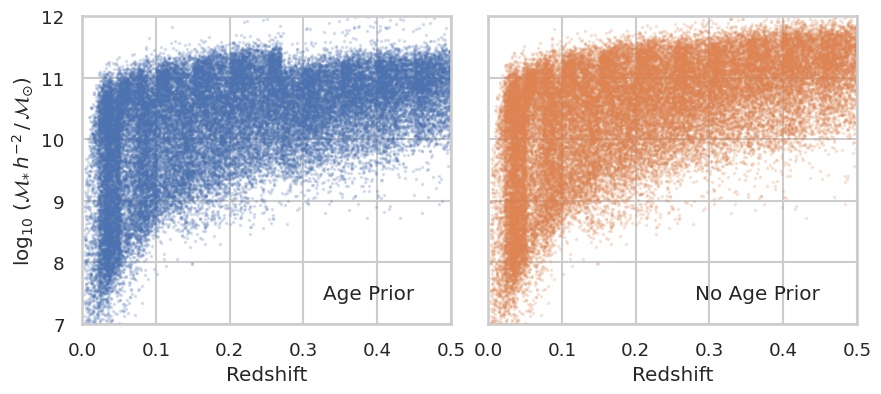

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1.scatter(fast1['Z'], fast1['LOGMSTAR'], s=1, alpha=0.2, color=colors[0])
ax2.scatter(fast2['Z'], fast2['LOGMSTAR'], s=1, alpha=0.2, color=colors[1])
for xx, label in zip((ax1, ax2), ('Age Prior', 'No Age Prior')):
    xx.set_xlim(0, 0.5)
    xx.set_ylim(7, 12)
    xx.set_xlabel('Redshift')
    xx.text(0.9, 0.1, label, ha='right', va='center', 
            transform=xx.transAxes)#, fontsize=10)
ax1.set_ylabel(r'$\log_{10}\, (\mathcal{M}_{*}\, h^{-2}\, /\, \mathcal{M}_{\odot})$');
fig.subplots_adjust(wspace=0.1)

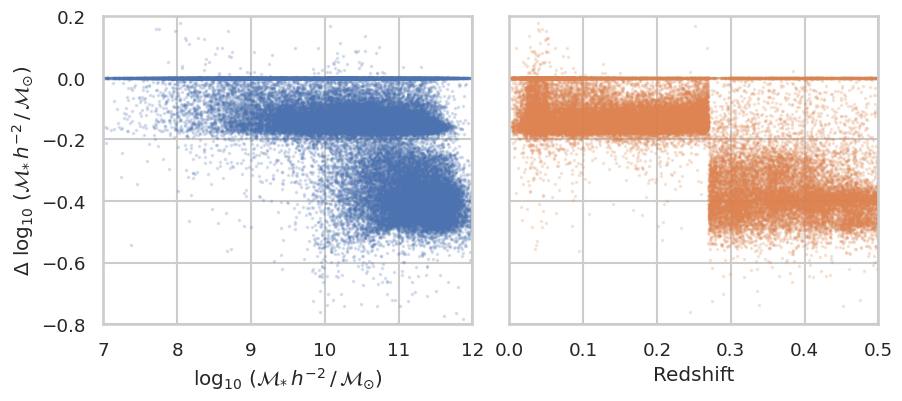

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1.scatter(fast2['LOGMSTAR'], fast1['LOGMSTAR']-fast2['LOGMSTAR'], s=1, alpha=0.2, color=colors[0])
ax2.scatter(fast2['Z'], fast1['LOGMSTAR']-fast2['LOGMSTAR'], s=1, alpha=0.2, color=colors[1])
for xx, label in zip((ax1, ax2), ('Age Prior', 'No Age Prior')):
    xx.set_ylim(-0.8, 0.2)
ax1.set_xlim(7, 12)
ax2.set_xlim(0, 0.5)
ax1.set_xlabel(r'$\log_{10}\, (\mathcal{M}_{*}\, h^{-2}\, /\, \mathcal{M}_{\odot})$');
ax2.set_xlabel('Redshift')
ax1.set_ylabel(r'$\Delta\ \log_{10}\, (\mathcal{M}_{*}\, h^{-2}\, /\, \mathcal{M}_{\odot})$');
fig.subplots_adjust(wspace=0.1)

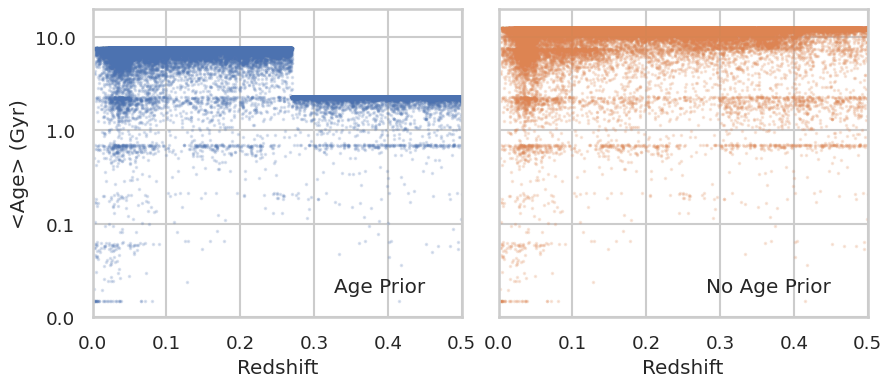

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1.scatter(fast1['Z'], fast1['AGE'], s=1, alpha=0.2, color=colors[0])
ax2.scatter(fast2['Z'], fast2['AGE'], s=1, alpha=0.2, color=colors[1])
for xx, label in zip((ax1, ax2), ('Age Prior', 'No Age Prior')):
    xx.set_ylim(0.01, 20)
    xx.set_xlim(0, 0.5)
    xx.set_xlabel('Redshift')
    xx.set_yscale('log')
    xx.text(0.9, 0.1, label, ha='right', va='center', 
            transform=xx.transAxes)#, fontsize=10)
    xx.yaxis.set_major_formatter(ScalarFormatter())
ax1.set_ylabel('<Age> (Gyr)')
fig.subplots_adjust(wspace=0.1)

fast1 minus PROVABGS = -0.483 +/- 0.431 (-0.425)
fast2 minus PROVABGS = -0.276 +/- 0.417 (-0.240)


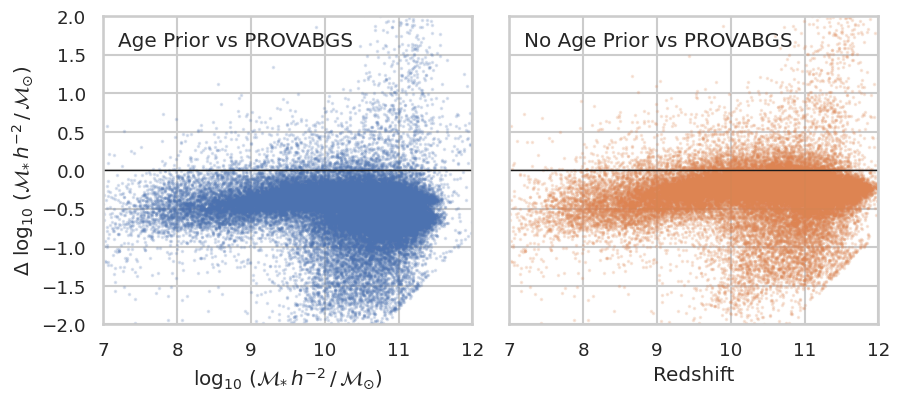

In [121]:
I = (cat['LOGMSTAR_PROVABGS'] > 7) * (cat['LOGMSTAR_PROVABGS'] < 13)
print('fast1 minus PROVABGS = {:.3f} +/- {:.3f} ({:.3f})'.format(
    np.mean(fast1['LOGMSTAR'][I]-cat['LOGMSTAR_PROVABGS'][I]),
    np.std(fast1['LOGMSTAR'][I]-cat['LOGMSTAR_PROVABGS'][I]),
    np.median(fast1['LOGMSTAR'][I]-cat['LOGMSTAR_PROVABGS'][I])))    
print('fast2 minus PROVABGS = {:.3f} +/- {:.3f} ({:.3f})'.format(
    np.mean(fast2['LOGMSTAR'][I]-cat['LOGMSTAR_PROVABGS'][I]),
    np.std(fast2['LOGMSTAR'][I]-cat['LOGMSTAR_PROVABGS'][I]),
    np.median(fast2['LOGMSTAR'][I]-cat['LOGMSTAR_PROVABGS'][I])))    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1.scatter(fast1['LOGMSTAR'], fast1['LOGMSTAR']-cat['LOGMSTAR_PROVABGS'], s=1, alpha=0.2, color=colors[0])
ax2.scatter(fast2['LOGMSTAR'], fast2['LOGMSTAR']-cat['LOGMSTAR_PROVABGS'], s=1, alpha=0.2, color=colors[1])
for xx, label in zip((ax1, ax2), ('Age Prior vs PROVABGS', 'No Age Prior vs PROVABGS')):
    xx.set_ylim(-2, 2)
    xx.text(0.04, 0.95, label, ha='left', va='top', 
            transform=xx.transAxes)#, fontsize=10)
    xx.axhline(y=0, color='k', lw=1)
ax1.set_xlim(7, 12)
ax2.set_xlim(7, 12)
ax1.set_xlabel(r'$\log_{10}\, (\mathcal{M}_{*}\, h^{-2}\, /\, \mathcal{M}_{\odot})$');
ax2.set_xlabel('Redshift')
ax1.set_ylabel(r'$\Delta\ \log_{10}\, (\mathcal{M}_{*}\, h^{-2}\, /\, \mathcal{M}_{\odot})$');
fig.subplots_adjust(wspace=0.1)

fast1 minus cigale = -0.270 +/- 0.320 (-0.329)
fast2 minus cigale = -0.066 +/- 0.323 (-0.134)


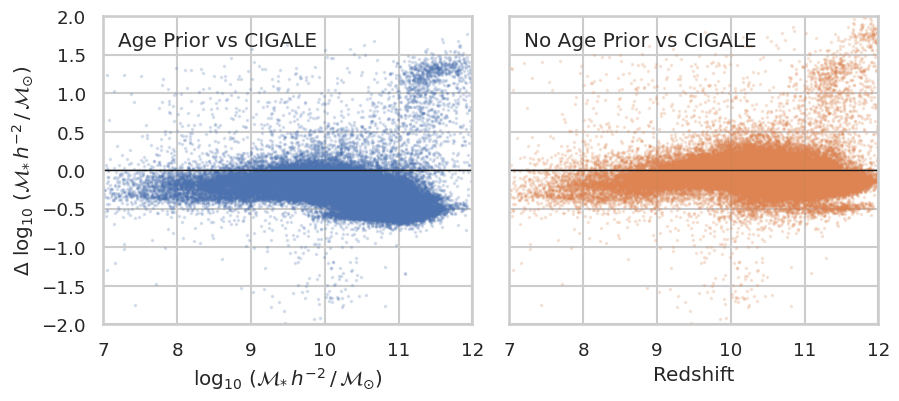

In [118]:
print('fast1 minus cigale = {:.3f} +/- {:.3f} ({:.3f})'.format(
    np.mean(fast1['LOGMSTAR']-cat['LOGMSTAR_CIGALE']),
    np.std(fast1['LOGMSTAR']-cat['LOGMSTAR_CIGALE']),
    np.median(fast1['LOGMSTAR']-cat['LOGMSTAR_CIGALE'])))    
print('fast2 minus cigale = {:.3f} +/- {:.3f} ({:.3f})'.format(
    np.mean(fast2['LOGMSTAR']-cat['LOGMSTAR_CIGALE']),
    np.std(fast2['LOGMSTAR']-cat['LOGMSTAR_CIGALE']),
    np.median(fast2['LOGMSTAR']-cat['LOGMSTAR_CIGALE'])))    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1.scatter(fast1['LOGMSTAR'], fast1['LOGMSTAR']-cat['LOGMSTAR_CIGALE'], s=1, alpha=0.2, color=colors[0])
ax2.scatter(fast2['LOGMSTAR'], fast2['LOGMSTAR']-cat['LOGMSTAR_CIGALE'], s=1, alpha=0.2, color=colors[1])
for xx, label in zip((ax1, ax2), ('Age Prior vs CIGALE', 'No Age Prior vs CIGALE')):
    xx.set_ylim(-2, 2)
    xx.text(0.04, 0.95, label, ha='left', va='top', 
            transform=xx.transAxes)#, fontsize=10)
    xx.axhline(y=0, color='k', lw=1)
ax1.set_xlim(7, 12)
ax2.set_xlim(7, 12)
ax1.set_xlabel(r'$\log_{10}\, (\mathcal{M}_{*}\, h^{-2}\, /\, \mathcal{M}_{\odot})$');
ax2.set_xlabel('Redshift')
ax1.set_ylabel(r'$\Delta\ \log_{10}\, (\mathcal{M}_{*}\, h^{-2}\, /\, \mathcal{M}_{\odot})$');
fig.subplots_adjust(wspace=0.1)

fast1 minus cigaleagn = 0.360 +/- 2.160 (-0.094)
fast2 minus cigale = 0.565 +/- 2.162 (0.089)


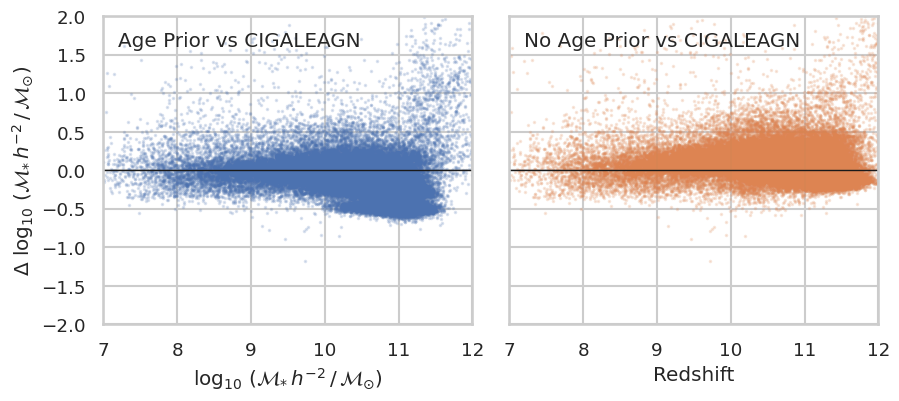

In [127]:
print('fast1 minus cigaleagn = {:.3f} +/- {:.3f} ({:.3f})'.format(
    np.mean(fast1['LOGMSTAR']-cat['LOGMSTAR_CIGALEAGN']),
    np.std(fast1['LOGMSTAR']-cat['LOGMSTAR_CIGALEAGN']),
    np.median(fast1['LOGMSTAR']-cat['LOGMSTAR_CIGALEAGN'])))    
print('fast2 minus cigale = {:.3f} +/- {:.3f} ({:.3f})'.format(
    np.mean(fast2['LOGMSTAR']-cat['LOGMSTAR_CIGALEAGN']),
    np.std(fast2['LOGMSTAR']-cat['LOGMSTAR_CIGALEAGN']),
    np.median(fast2['LOGMSTAR']-cat['LOGMSTAR_CIGALEAGN'])))    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1.scatter(fast1['LOGMSTAR'], fast1['LOGMSTAR']-cat['LOGMSTAR_CIGALEAGN'], s=1, alpha=0.2, color=colors[0])
ax2.scatter(fast2['LOGMSTAR'], fast2['LOGMSTAR']-cat['LOGMSTAR_CIGALEAGN'], s=1, alpha=0.2, color=colors[1])
for xx, label in zip((ax1, ax2), ('Age Prior vs CIGALEAGN', 'No Age Prior vs CIGALEAGN')):
    xx.set_ylim(-2, 2)
    xx.text(0.04, 0.95, label, ha='left', va='top', 
            transform=xx.transAxes)#, fontsize=10)
    xx.axhline(y=0, color='k', lw=1)
ax1.set_xlim(7, 12)
ax2.set_xlim(7, 12)
ax1.set_xlabel(r'$\log_{10}\, (\mathcal{M}_{*}\, h^{-2}\, /\, \mathcal{M}_{\odot})$');
ax2.set_xlabel('Redshift')
ax1.set_ylabel(r'$\Delta\ \log_{10}\, (\mathcal{M}_{*}\, h^{-2}\, /\, \mathcal{M}_{\odot})$');
fig.subplots_adjust(wspace=0.1)

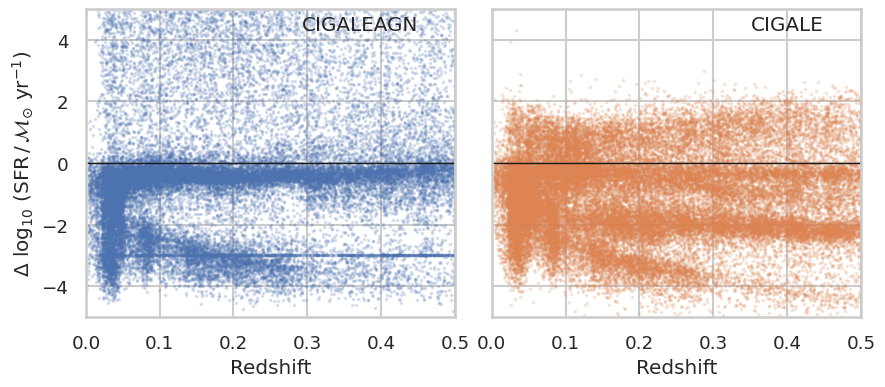

In [152]:
logsfr = fast2['SFR']
logsfr[logsfr == 0] = 1e-3
logsfr = np.log10(logsfr)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1.scatter(fast1['Z'], logsfr-cat['LOGSFR_CIGALEAGN'], s=1, alpha=0.2, color=colors[0])
ax2.scatter(fast2['Z'], logsfr-np.log10(cat['SFR_CIGALE']), s=1, alpha=0.2, color=colors[1])
for xx, label in zip((ax1, ax2), ('CIGALEAGN', 'CIGALE')):
    xx.set_ylim(-5, 5)
    xx.set_xlim(0, 0.5)
    xx.set_xlabel('Redshift')
    xx.text(0.9, 0.95, label, ha='right', va='center', 
            transform=xx.transAxes)#, fontsize=10)
    xx.axhline(y=0, color='k', lw=1)
ax1.set_ylabel(r'$\Delta\ \log_{10}\, (\mathrm{SFR}\, /\, \mathcal{M}_{\odot}\ \mathrm{yr}^{-1})$');
fig.subplots_adjust(wspace=0.1)